In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import tree 
  
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
  
import warnings 

In [4]:
iris = load_iris() 
iris = sns.load_dataset('iris') 
iris.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gi

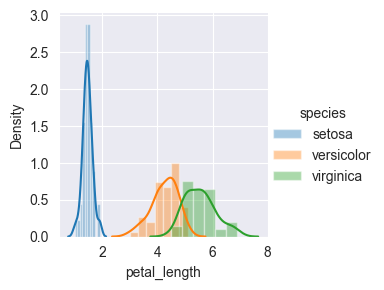

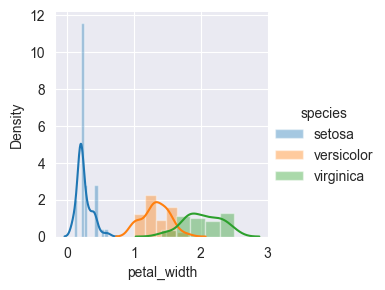

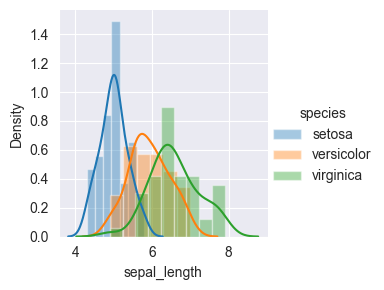

In [10]:
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"] 
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"] 
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"] 
  
sns.FacetGrid(iris,
              hue="species").map(sns.distplot, 
                          "petal_length").add_legend() 
sns.FacetGrid(iris,
              hue="species").map(sns.distplot, 
                          "petal_width").add_legend() 
sns.FacetGrid(iris,
              hue="species").map(sns.distplot, 
                          "sepal_length").add_legend() 
plt.show() 

In [13]:
X = iris.iloc[:, :-2] 
y = iris["species"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=0.33, 
                                       random_state=42) 
treemodel = DecisionTreeClassifier() 
treemodel.fit(X_train, y_train) 

DecisionTreeClassifier()

0.94
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.83      0.91        18
   virginica       0.81      1.00      0.90        13

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50


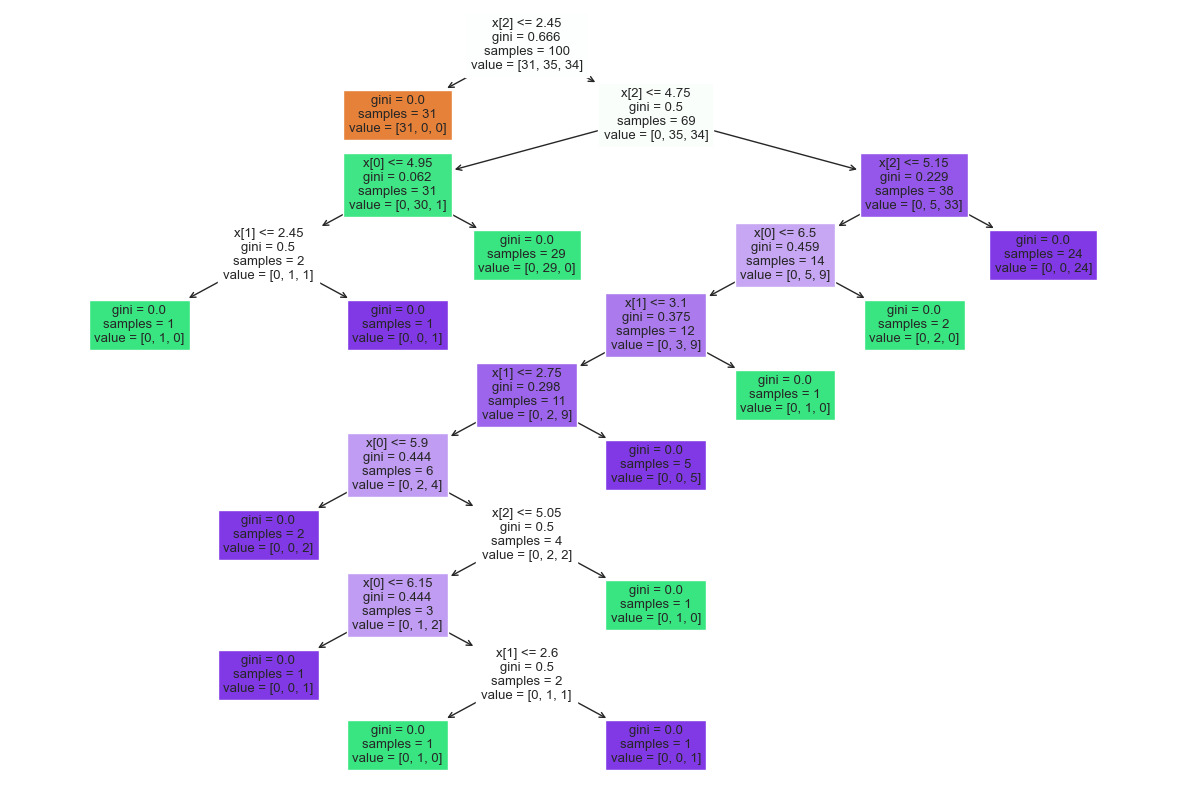

In [14]:
plt.figure(figsize=(15, 10)) 
tree.plot_tree(treemodel, filled=True) 
ypred = treemodel.predict(X_test) 
score = accuracy_score(ypred, y_test) 
print(score) 
print(classification_report(ypred, y_test)) 